# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers

## Get the dataset

In [12]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [13]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [14]:
# Pre processing 
X_train=X_train/255.0
X_test=X_test/255.0
digits=np.unique(Y_train)



## Visualize the dataset
Print some images with labels.

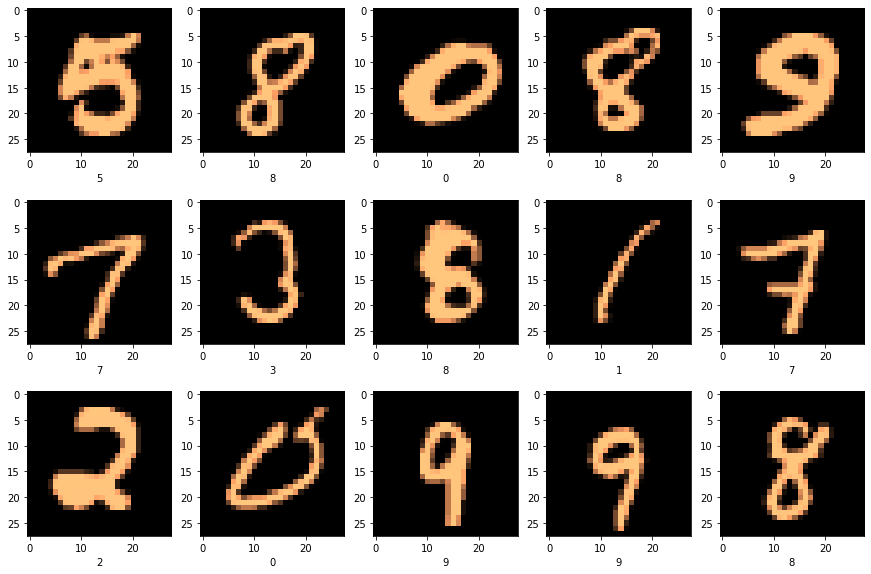

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i in range(15):
  plt.subplot(3,5,i+1)
  r=np.random.randint(0,len(X_train))
  plt.imshow(X_train[r],cmap='copper')
  plt.xlabel(Y_train[r])
# Your code
plt.show()

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

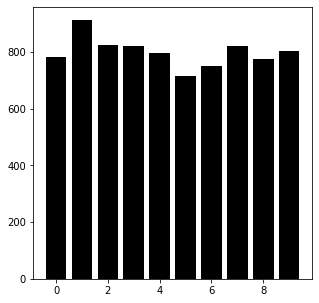

In [21]:
import numpy as np
plt.figure(figsize=(5,5))
plt.bar(digits,np.unique(Y_train, return_counts=True)[1],color='black')
# Your code
plt.show()

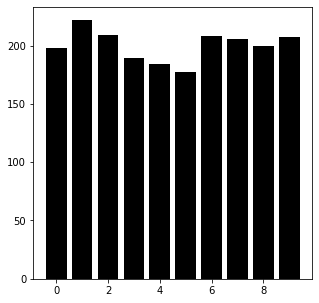

In [22]:
import numpy as np
plt.figure(figsize=(5,5))
plt.bar(digits,np.unique(Y_test, return_counts=True)[1],color='black')
plt.show()


## Model

In [44]:
# model building
model= keras.Sequential([
                         layers.Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(28,28,1)),
                         layers.Conv2D(128,(3,3),padding="same", activation="relu"),
                         layers.Conv2D(32,(3,3),padding="same", activation="relu"),
                         layers.MaxPooling2D(pool_size=(2,2)),
                         layers.Dropout(0.2),

                         layers.Flatten(),
                         layers.Dense(256,activation="relu"),
                         layers.Dropout(0.2),
                         layers.Dense(10, activation="softmax")


])
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 


In [45]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 128)       36992     
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        36896     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                      

In [46]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history=model.fit(X_train,Y_train, epochs=20, validation_split=0.2)


Epoch 1/20
200/200 [==============================] - 2s 8ms/step - loss: 0.3703 - accuracy: 0.8850 - val_loss: 0.1262 - val_accuracy: 0.9606
Epoch 2/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0919 - accuracy: 0.9692 - val_loss: 0.1048 - val_accuracy: 0.9694
Epoch 3/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0611 - accuracy: 0.9814 - val_loss: 0.0519 - val_accuracy: 0.9819
Epoch 4/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0361 - accuracy: 0.9875 - val_loss: 0.0600 - val_accuracy: 0.9825
Epoch 5/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0306 - accuracy: 0.9884 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 6/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.0650 - val_accuracy: 0.9844
Epoch 7/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 0.0473 - val_accuracy: 0.9850
Epoch 

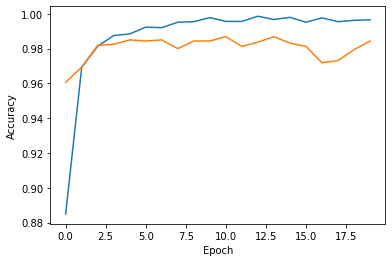

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [51]:
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.1331 - accuracy: 0.9770


[0.13312648236751556, 0.9769999980926514]

## Predict some images
Print the image along with its label (true value) and predicted value.

In [58]:
out=model.predict(X_test[:15])
preds=[]
for i in out:
  preds.append(np.argmax(i))
  

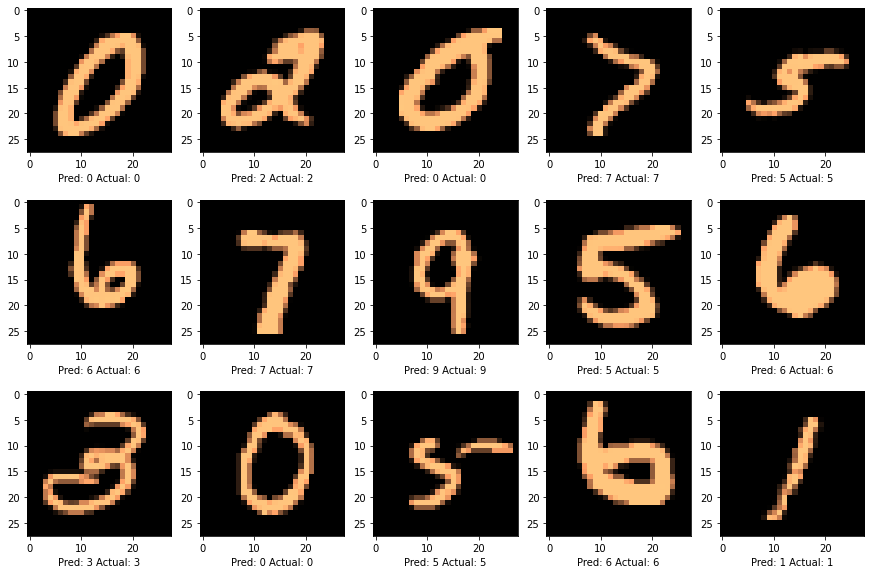

In [62]:
plt.figure(figsize=(15,10))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(X_test[i],cmap='copper')
  plt.xlabel("Pred: "+str(preds[i])+" Actual: " + str(Y_test[i]))
# Your code
plt.show()